In [11]:
import pandas as pd

csv_path = r"D:\!учеба\ML\lr1\heart2022.csv"
df = pd.read_csv(csv_path)

print(f"Общий размер датасета: {df.shape[0]} строк, {df.shape[1]} колонок")

Общий размер датасета: 445132 строк, 40 колонок


In [12]:
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [13]:
#дубли, пропуски
df_cleaned = df.drop_duplicates()
df_final = df_cleaned.dropna().copy()

print(f"После удаления пропусков и дублей: {df_final.shape}")

После удаления пропусков и дублей: (246013, 40)


In [16]:
# Считаем количество каждого класса
class_counts = df_final['HadDiabetes'].value_counts()
class_percentages = df_final['HadDiabetes'].value_counts(normalize=True) * 100

print(f"Общее количество строк: {len(df_final):,}")
print("\nПроцентное соотношение классов:")

print(f"Класс 0 (нет диабета): {class_percentages.iloc[0]:.2f}%")
print(f"Класс 1 (диабет): {class_percentages.iloc[1]:.2f}%")

Общее количество строк: 246,013

Процентное соотношение классов:
Класс 0 (нет диабета): 83.26%
Класс 1 (диабет): 13.74%


In [17]:
#удаляем колонки нерелеватные
columns_to_keep = [
    'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
    'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
    'HadArthritis', 'HadDiabetes', 'DifficultyWalking', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
    'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HighRiskLastYear',
    'HadHeartAttack'
]

# Проверяем, какие колонки из списка существуют в датасете
existing_columns = [col for col in columns_to_keep if col in df.columns]
missing_columns = [col for col in columns_to_keep if col not in df.columns]

if missing_columns:
    print(f"Предупреждение: следующие колонки отсутствуют в датасете: {missing_columns}")
    print("Будут сохранены только существующие колонки из списка.")

# Оставляем только нужные колонки
df_filtered = df_final[existing_columns]
df_filtered.to_csv('heart_disease_not_balanced_j.csv', index=False)

print(f"Исходный датасет: {df_final.shape[0]} строк, {df_final.shape[1]} колонок")
print(f"Фильтрованный датасет: {df_filtered.shape[0]} строк, {df_filtered.shape[1]} колонок")
print(f"Сохраненные колонки: {list(df_filtered.columns)}")

Исходный датасет: 246013 строк, 40 колонок
Фильтрованный датасет: 246013 строк, 26 колонок
Сохраненные колонки: ['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HighRiskLastYear', 'HadHeartAttack']


In [25]:
numerical_cols = df_filtered.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = df_filtered.select_dtypes(include=['object']).columns.tolist()

print("Числовые колонки:", numerical_cols)
print("Категориальные колонки:", categorical_cols)

Числовые колонки: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'WeightInKilograms', 'BMI']
Категориальные колонки: ['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HighRiskLastYear', 'HadHeartAttack']


In [26]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

%matplotlib inline

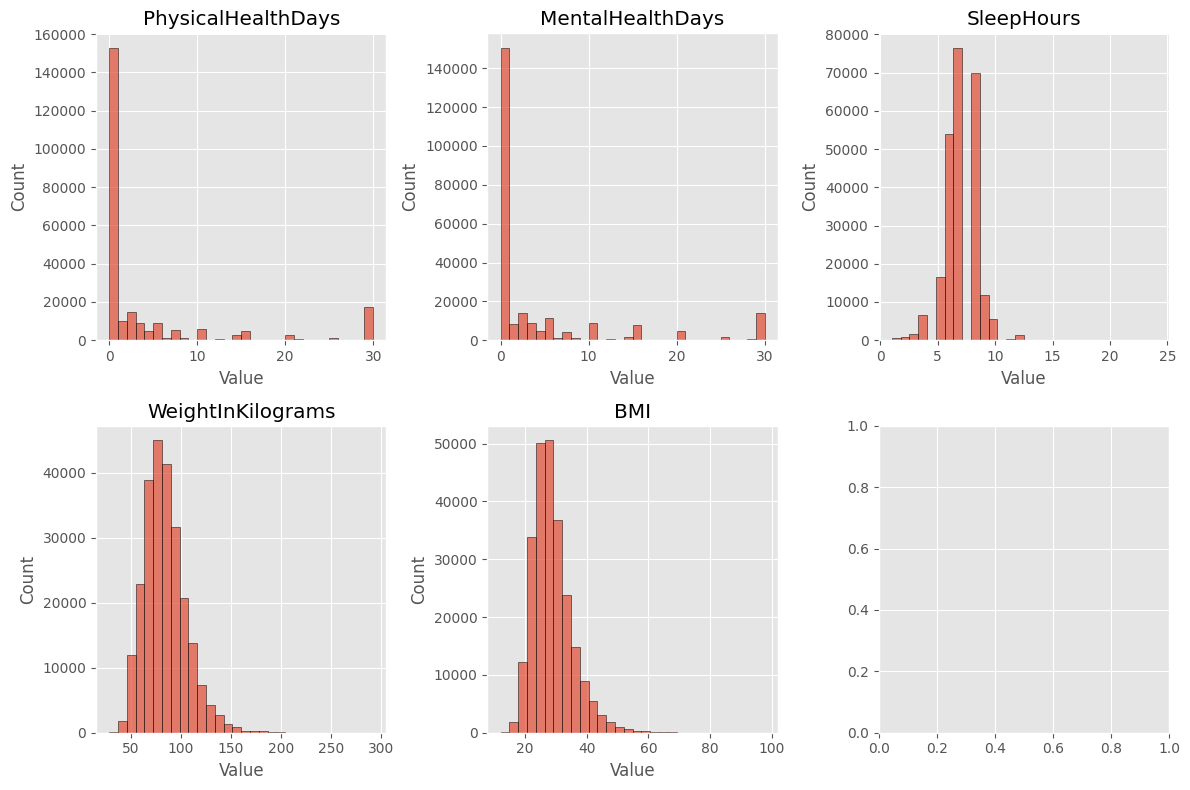

In [28]:
#смотрим распределение у числовых братьев
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_num = i % 3
    ax = axes[row, col_num]
    
    ax.hist(df_filtered[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [31]:
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

df_processed = df_filtered.copy()

# Кодирование категориальных братьев
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

standard_cols = ['SleepHours', 'WeightInKilograms', 'BMI']
if all(col in df_processed.columns for col in standard_cols):
    scaler_standard = StandardScaler()
    # Используем .loc для безопасного присвоения
    df_processed.loc[:, standard_cols] = scaler_standard.fit_transform(df_processed[standard_cols])

robust_cols = ['PhysicalHealthDays', 'MentalHealthDays']
if all(col in df_processed.columns for col in robust_cols):
    scaler_robust = RobustScaler()
    df_processed.loc[:, robust_cols] = scaler_robust.fit_transform(df_processed[robust_cols])


In [32]:
df_processed.head(5)

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,WeightInKilograms,BMI,AlcoholDrinkers,HighRiskLastYear,HadHeartAttack
342,0,4,1.333333,0.00,1,1.373426,0,0,0,0,...,0,2,0,4,12,-0.560213,-0.104123,0,0,0
343,1,4,0.000000,0.00,1,-0.708902,0,0,0,0,...,0,2,0,4,2,0.545626,0.224400,0,0,0
345,1,4,0.000000,0.00,0,0.679317,0,0,0,0,...,0,2,0,4,3,1.183898,0.459279,1,0,0
346,0,1,1.666667,0.00,1,1.373426,0,0,0,1,...,0,3,0,4,4,0.333181,0.407084,0,0,0
347,0,2,1.000000,3.75,1,-1.403011,0,0,0,0,...,0,3,0,4,4,-0.198635,0.675736,0,0,0


In [ ]:
#удаляем строки, удаляя мажоритатный класс
